## Subplots

In the previous section, "Styling your plots", we set the title of a plot using a bit of `matplotlib` code. We did this by grabbing the underlying "axis" and then calling `set_title` on that.

In this section we'll explore another `matplotlib`-based stylistic feature: **subplotting**.

In [1]:
import pandas as pd
reviews = pd.read_csv("../input/wine-reviews/winemag-data_first150k.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


## Subplotting

Subplotting is a technique for creating multiple plots that live side-by-side in one overall figure. We can use the `subplots` method to create a figure with multiple subplots. `subplots` takes two arguments. The first one controls the number of *rows*, the second one the number of *columns*.

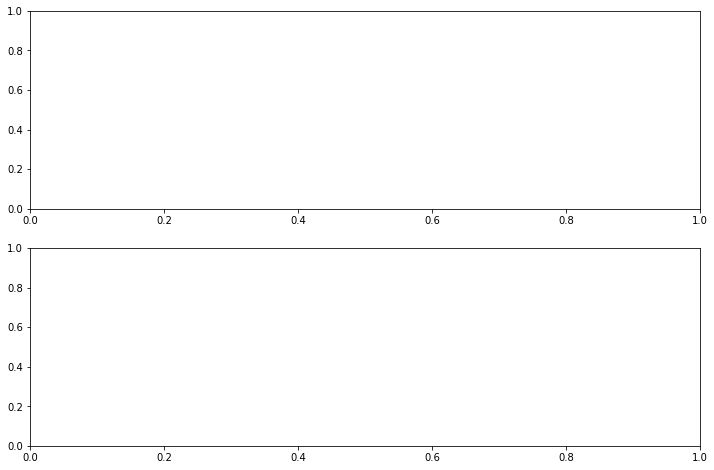

In [2]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

Since we asked for a `subplots(2, 1)`, we got a figure with two rows and one column.

Let's break this down a bit. When `pandas` generates a bar chart, behind the scenes here is what it actually does:

1. Generate a new `matplotlib` `Figure` object.
2. Create a new `matplotlib` `AxesSubplot` object, and assign it to the `Figure`.
3. Use `AxesSubplot` methods to draw the information on the screen.
4. Return the result to the user.

In a similar way, our `subplots` operation above created one overall `Figure` with two `AxesSubplots` vertically nested inside of it.

`subplots` returns two things, a figure (which we assigned to `fig`) and an array of the axes contained therein (which we assigned to `axarr`). Here are the `axarr` contents:

In [3]:
axarr

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f04d5374860>,
      dtype=object)

To tell `pandas` which subplot we want a new plot to go in&mdash;the first one or the second one&mdash;we need to grab the proper axis out of the list and pass it into `pandas` via the `ax` parameter:

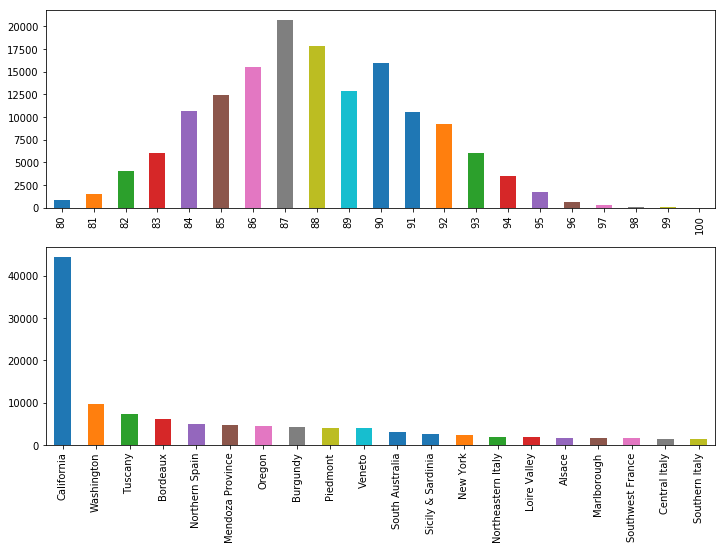

In [4]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0]
)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1]
)

We are of course not limited to having only a single row. We can create as many subplots as we want, in whatever configuration we need.

For example:

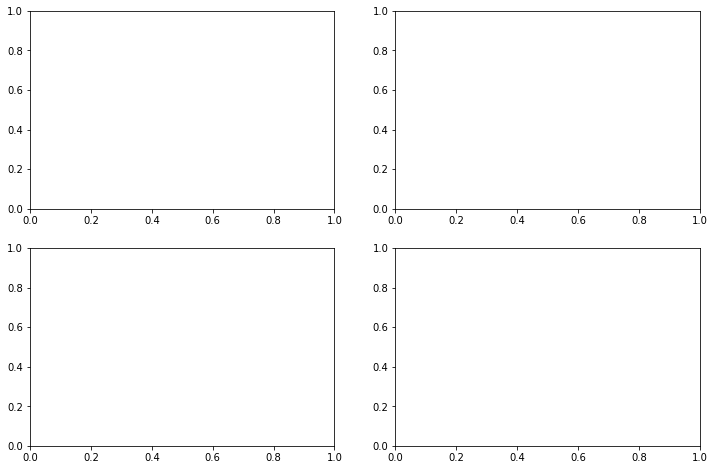

In [5]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

If there are multiple columns *and* multiple rows, as above, the axis array becoming a list of lists:

In [6]:
axarr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04d532f7b8>,
      dtype=object)

That means that to plot our data from earlier, we now need a row number, then a column number.

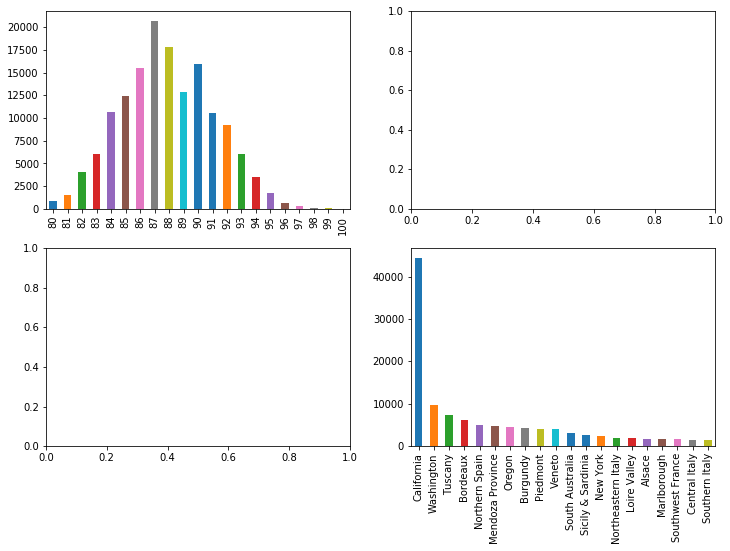

In [7]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0]
)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1]
)

Notice that the bar plot of wines by point counts is in the first row and first column (the `[0][0]` position), while the bar plot of wines by origin is in the second row and second column (`[1][1]`).

By combining subplots with the styles we learned in the last section, we can create appealing-looking panel displays.

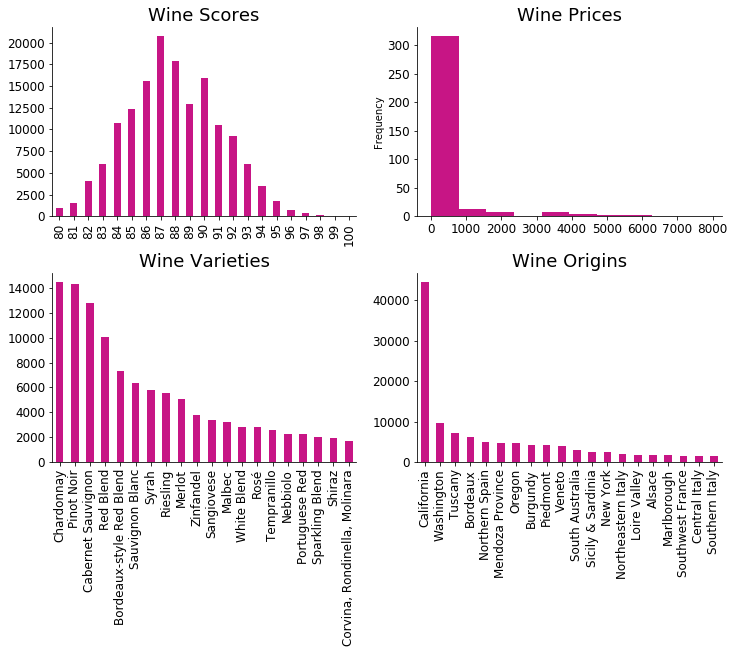

In [8]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], fontsize=12, color='mediumvioletred'
)
axarr[0][0].set_title("Wine Scores", fontsize=18)

reviews['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1][0], fontsize=12, color='mediumvioletred'
)
axarr[1][0].set_title("Wine Varieties", fontsize=18)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1], fontsize=12, color='mediumvioletred'
)
axarr[1][1].set_title("Wine Origins", fontsize=18)

reviews['price'].value_counts().plot.hist(
    ax=axarr[0][1], fontsize=12, color='mediumvioletred'
)
axarr[0][1].set_title("Wine Prices", fontsize=18)

plt.subplots_adjust(hspace=.3)

import seaborn as sns
sns.despine()

# Why subplot?

Why are subplots useful?

Oftentimes as a part of the exploratory data visualization process you will find yourself creating a large number of smaller charts probing one or a few specific aspects of the data. For example, suppose we're interested in comparing the scores for relatively common wines with those for relatively rare ones. In these cases, it makes logical sense to combine the two plots we would produce into one visual "unit" for analysis and discussion.

When we combine subplots with the style attributes we explored in the previous notebook, this technique allows us to create extremely attractive and informative panel displays.

Finally, subplots are critically useful because they enable **faceting**. Faceting is the act of breaking data variables up across multiple subplots, and combining those subplots into a single figure. So instead of one bar chart, we might have, say, four, arranged together in a grid.

The recommended way to perform faceting is to use the `seaborn` `FacetGrid` facility. This feature is explored in a separate section of this tutorial.

# Exercises

Let's test ourselves by answering some questions about the plots we've used in this section. Once you have your answers, click on "Output" button below to show the correct answers.

1. A `matplotlib` plot consists of a single X composed of one or more Y. What are X and Y?
2. The `subplots` function takes which two parameters as input?
3. The `subplots` function returns what two variables? 

In [9]:
from IPython.display import HTML
HTML("""
<ol>
<li>The plot consists of one overall figure composed of one or more axes.</li>
<li>The subplots function takes the number of rows as the first parameter, and the number of columns as the second.</li>
<li>The subplots function returns a figure and an array of axes.</li>
</ol>
""")

To put your design skills to the test, try forking this notebook and replicating the plots that follow. To see the answers, hit the "Input" button below to un-hide the code.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
pokemon = pd.read_csv("../input/pokemon/Pokemon.csv")
pokemon.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


(Hint: use `figsize=(8, 8)`)

(<Figure size 576x576 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f04c6381898>,
       dtype=object))

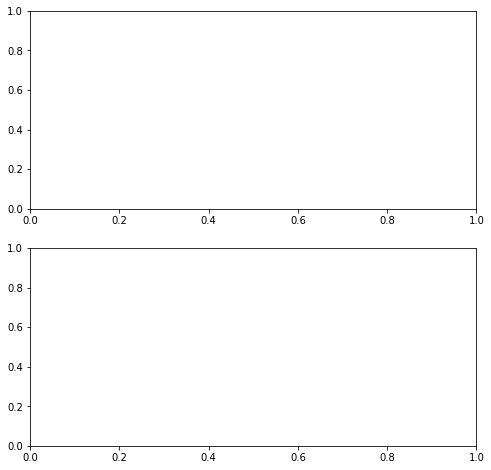

In [11]:
plt.subplots(2, 1, figsize=(8, 8))

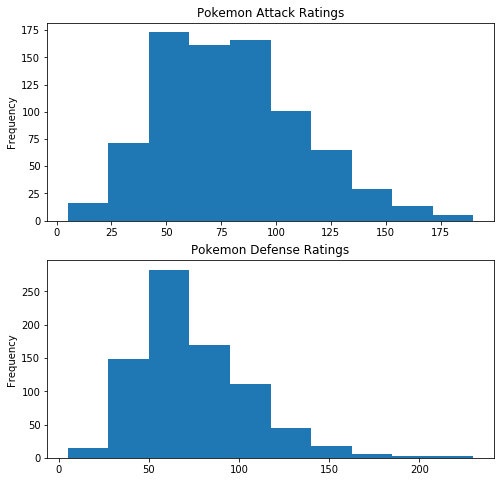

In [12]:
fig, axarr = plt.subplots(2, 1, figsize=(8, 8))
pokemon['Attack'].plot.hist(ax=axarr[0], title='Pokemon Attack Ratings')
pokemon['Defense'].plot.hist(ax=axarr[1], title='Pokemon Defense Ratings')

# Conclusion

In the previous section we explored some `pandas`/`matplotlib` style parameters. In this section, we dove a little deeper still by exploring subplots.

Together these two sections conclude our primer on style. Hopefully our plots will now be more legible and informative.

[Click here to go to the next section, "Plotting with seaborn"](https://www.kaggle.com/residentmario/plotting-with-seaborn).